# Airbnb - Q1, Q2 & Q3 (Boston & Seattle) - Prepare Data (Part 1)

This notebook has been created to process the data into the format needed in order to anaswer the first three key questions including dealing with NaN's, dropping unwanted columns and reformatting the data into the format needed for the analysis. The bulk of the functions for these processes will be stored in the new package called airbnb_pkg.

The first three questions covered in this task should be easy to answer after the initial processing and so will be covered in this notebook. These are as follows:

- Which market is most expensive Seattle or Boston?
- Is the price seasonal & market has a larger seasonal trend?
- Which property size metric influences prices most property type, property size, number of beds, number of rooms etc?

## 1. Imports

In [28]:
# Imports basic functions
import pandas as pd
import numpy as np

# Imports functions for plotting graphs
import matplotlib.pyplot as plt
import seaborn as sns

# Imports custom made airbnb package
import airbnb_pkg as airbnb

## 2. Functions

In [ ]:
def plot_histogram(data, column, market, ax, binsize=50, y_label='', x_label=''):
    """
    Function to plot standard histograms (Can be used for individual or side by side plots)
    """
    # Plots the Seattle Graph with title & axis
    sns.distplot(data[column], kde=False, color='blue', bins=binsize, ax=ax)
    
    # Sets up the title based on the plotting column and the market    
    ax.set_title(f"{market} {column} data", fontsize=25)
    
    # Sets the y and x labels
    ax.set_ylabel(y_label, fontsize=20)
    ax.set_xlabel(x_label, fontsize=20)
    
    # Removes spines and changes layout to tight
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)


def data_merge(calendar_data, listings_data):
    """
    This function merges the two most useful datasets for this analysis calender & listings
    """
    # For the sake of this analysis      

## 3. Basic Setup (Read data, create global variables etc.)

In [2]:
# Read in the .csv files for Seattle 
Seattle_Cal = pd.read_csv('Data/Seattle/calendar.csv')
Seattle_List = pd.read_csv('Data/Seattle/listings.csv')
Seattle_Rev = pd.read_csv('Data/Seattle/reviews.csv')

# Read in the .csv files for Boston 
Boston_Cal = pd.read_csv('Data/Boston/calendar.csv')
Boston_List = pd.read_csv('Data/Boston/listings.csv')
Boston_Rev = pd.read_csv('Data/Boston/reviews.csv')

## Basic Initial Cleaning

In [5]:
# Initial clean up of the calender data
Seattle_Cal_clean = airbnb.clean_calendar_data(Seattle_Cal)
Boston_Cal_clean = airbnb.clean_calendar_data(Boston_Cal)

# Initial clean up of the listings data
Seattle_List_clean = airbnb.clean_listings_data(Seattle_List)
Boston_List_clean = airbnb.clean_listings_data(Boston_List)

# Initial clean up of the review data
Seattle_Rev_clean = airbnb.clean_reviews_data(Seattle_Rev)
Boston_Rev_clean = airbnb.clean_reviews_data(Boston_Rev)

Columns dropped: {'square_feet'}
Number of rows dropped: 0
Columns dropped: {'square_feet'}
Number of rows dropped: 0


### Q1 - Which market is most expensive Seattle or Boston?

In [ ]:
# There's a few different metrics that could be used to judge this cost and a number of ways of analysing the data.

In [27]:
# To start we'll look at the average price and spread of the calendar_data
print('----- Seattle -----')
print(Seattle_Cal_clean['price'].describe())
print(f'Median: {Seattle_Cal_clean.price.median()}')
print('----- Boston -----')
print(Boston_Cal_clean['price'].describe())
print(f"Median: {Boston_Cal_clean.price.median()}")

----- Seattle -----
count    934542.000000
mean        137.944859
std         105.062870
min          10.000000
25%          75.000000
50%         109.000000
75%         160.000000
max        1650.000000
Name: price, dtype: float64
Median: 109.0
----- Boston -----
count    643037.000000
mean        198.438909
std         180.142913
min          11.000000
25%          85.000000
50%         150.000000
75%         255.000000
max        7163.000000
Name: price, dtype: float64
Median: 150.0


#### Initial Results
From some initial stats it looks like Boston is more expensive than Seattle as the average is much higher. However, Boston also has much more of a spread of data than Seattle with a much larger interquartile range. Although using the median helps exclude some of the outliers it might be worth doing a historgam see if these outliers should be removed prior to producing these stats.

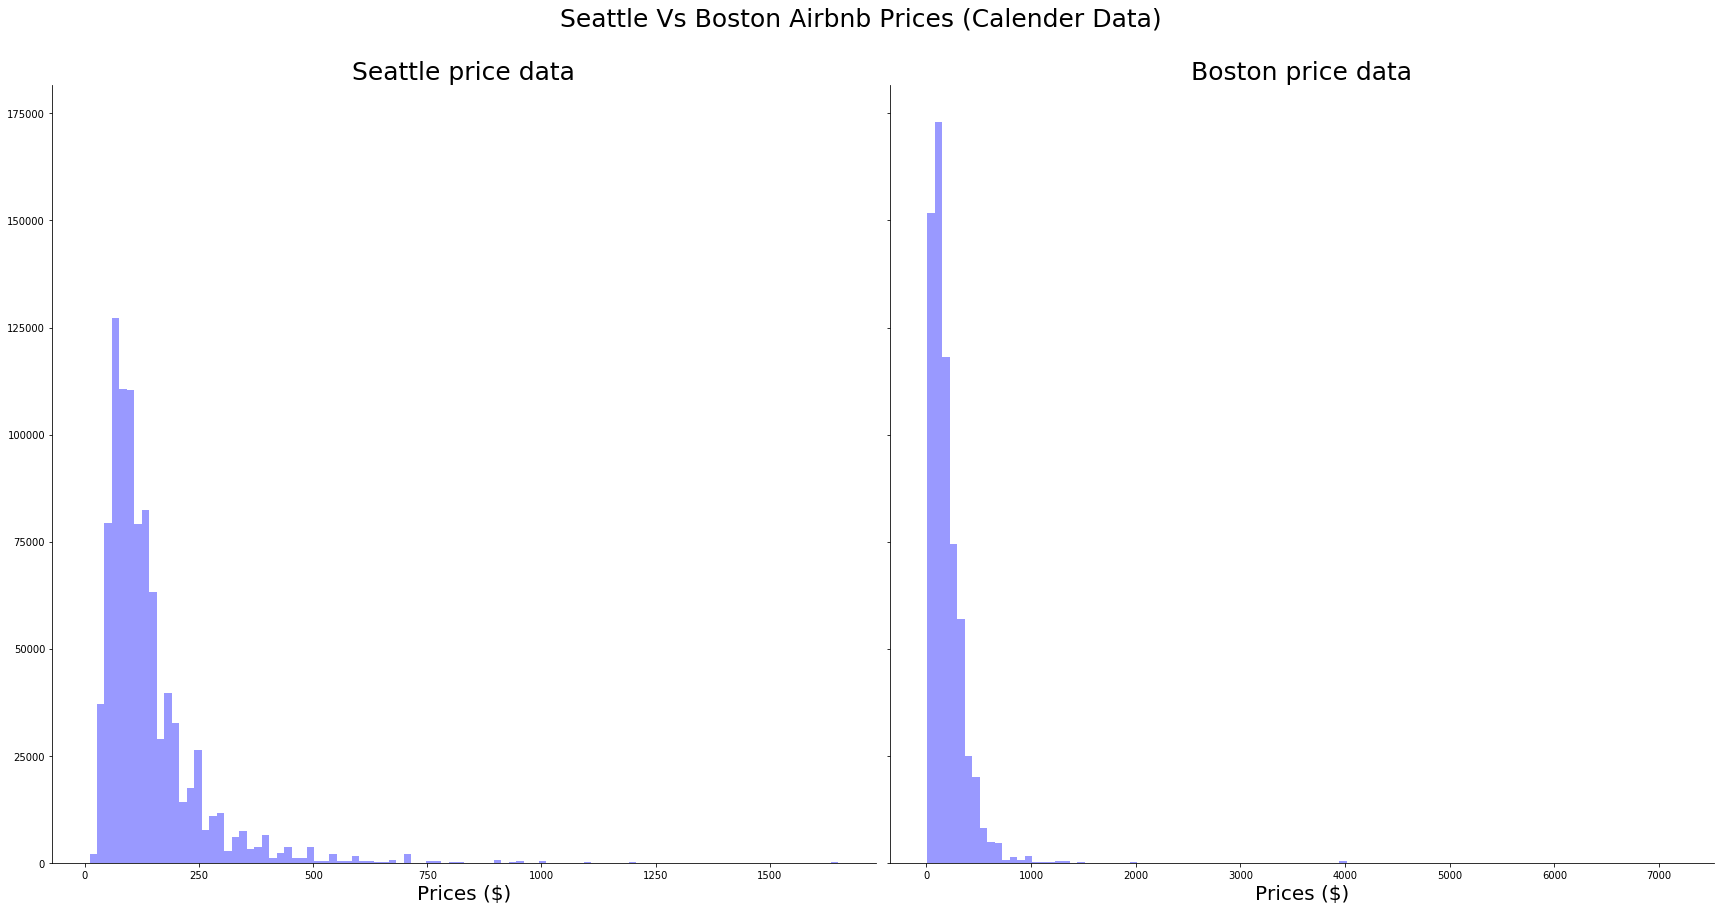

In [74]:
# Setup the graphs and add the main title
fig, (ax1, ax2) = plt.subplots(figsize=(24,12), ncols=2, sharey=True)
plt.suptitle("Seattle Vs Boston Airbnb Prices (Calender Data)", y = 1.05, fontsize=25)

# Plots the Seattle Graph with title & axis
plot_histogram(Seattle_Cal_clean, 'price', 'Seattle', ax1, binsize=100, x_label='Prices ($)')

# Plots the Boston Graph with title & axis
plot_histogram(Boston_Cal_clean, 'price', 'Boston', ax2, binsize=100, x_label='Prices ($)')

plt.tight_layout()